In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format
import sys
sys.path.append('..')
from utility import plot_settings
from utility.visualize import plot_predicted_vs_true, plot_residuals, regression_scatter

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



In [34]:
df = pd.read_pickle('../../data/processed/YearlySalary_model_p2.pkl')
df.head()

,Age,CurrentJob,EdLevel,Industry,RemoteWork,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region,MacOS,Linux,Windows,Other_OS,JavaScript,HTML/CSS,SQL,Python,TypeScript,Bash/Shell (all shells),Ruby,Other_Language
0,25-34 years old,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,"Hybrid (some remote, some in-person)","156,000.00",12.00,7.00,0,1,North America,1,0,0,0,1,1,1,0,1,1,1,1
1,25-34 years old,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Remote,"23,456.00",6.00,4.00,1,1,South Asia,0,0,0,1,1,1,0,0,1,0,0,0
2,35-44 years old,"Developer, back-end",Some college/university study without earning ...,Other,Remote,"96,828.00",21.00,21.00,1,1,Europe,1,0,0,0,1,1,1,0,1,1,1,0
3,35-44 years old,"Developer, full-stack",Some college/university study without earning ...,Technology,Remote,"135,000.00",4.00,3.00,1,1,North America,1,0,0,0,1,1,0,0,1,0,1,1
4,25-34 years old,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Financial Services,Remote,"80,000.00",5.00,3.00,1,1,North America,1,1,1,0,1,1,1,1,1,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
X = df.drop('YearlySalary', axis=1)
y = df['YearlySalary']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31254 entries, 20370 to 15802
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      31254 non-null  object 
 1   CurrentJob               31254 non-null  object 
 2   EdLevel                  31254 non-null  object 
 3   Industry                 31254 non-null  object 
 4   RemoteWork               31254 non-null  object 
 5   YearsCode                31254 non-null  float64
 6   YearsCodePro             31254 non-null  float64
 7   z_UsingAI                31254 non-null  int64  
 8   Developer                31254 non-null  int64  
 9   Region                   31254 non-null  object 
 10  MacOS                    31254 non-null  int64  
 11  Linux                    31254 non-null  int64  
 12  Windows                  31254 non-null  int64  
 13  Other_OS                 31254 non-null  int64  
 14  JavaScript             

This is a very interesting graph. Simply, living in North America makes you earn more!! Living in south Asia and south America is unfair. Why people using AI has a negative correlation?? I think it is because AI is a new field and people are still learning it. So, they are not paid well. But, I am not sure. I would like to hear your thoughts on this. 
The correlation with the OS I think it's because most users of MacOS live in North America and Europe. So, they are paid more.

In [39]:
print(f" X_train % of X = {(len(X_train)/ len(X)) * 100}")
print(f" X_test % of X = {(len(X_test)/ len(X)) * 100}")


 X_train % of X = 69.99932809245448
 X_test % of X = 30.000671907545524


In [40]:
num_cols = X_train.select_dtypes(include='number').columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

cat_cols = X_train.select_dtypes(include='object').columns
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])


In [41]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=500))
])

In [42]:
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['YearsCode', 'YearsCodePro', 'z_UsingAI', 'Developer', 'MacOS', 'Linux',
       'Windows', 'Other_OS', 'JavaScript', 'HTML/CSS', 'SQL', 'Python',
       'TypeScript', 'Bash/Shell (all shells)', 'Ruby', 'Other_Language'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Age', 'CurrentJob', 'EdLevel', 'Industry', 'RemoteWork', 'Region'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                       random_state=42))])

In [43]:
print(rf_model.score(X_test, y_test))

0.5099111768010007


In [44]:
rf_model.score(X_train, y_train)

0.9342798410940969

Our model is very, very overfitted.

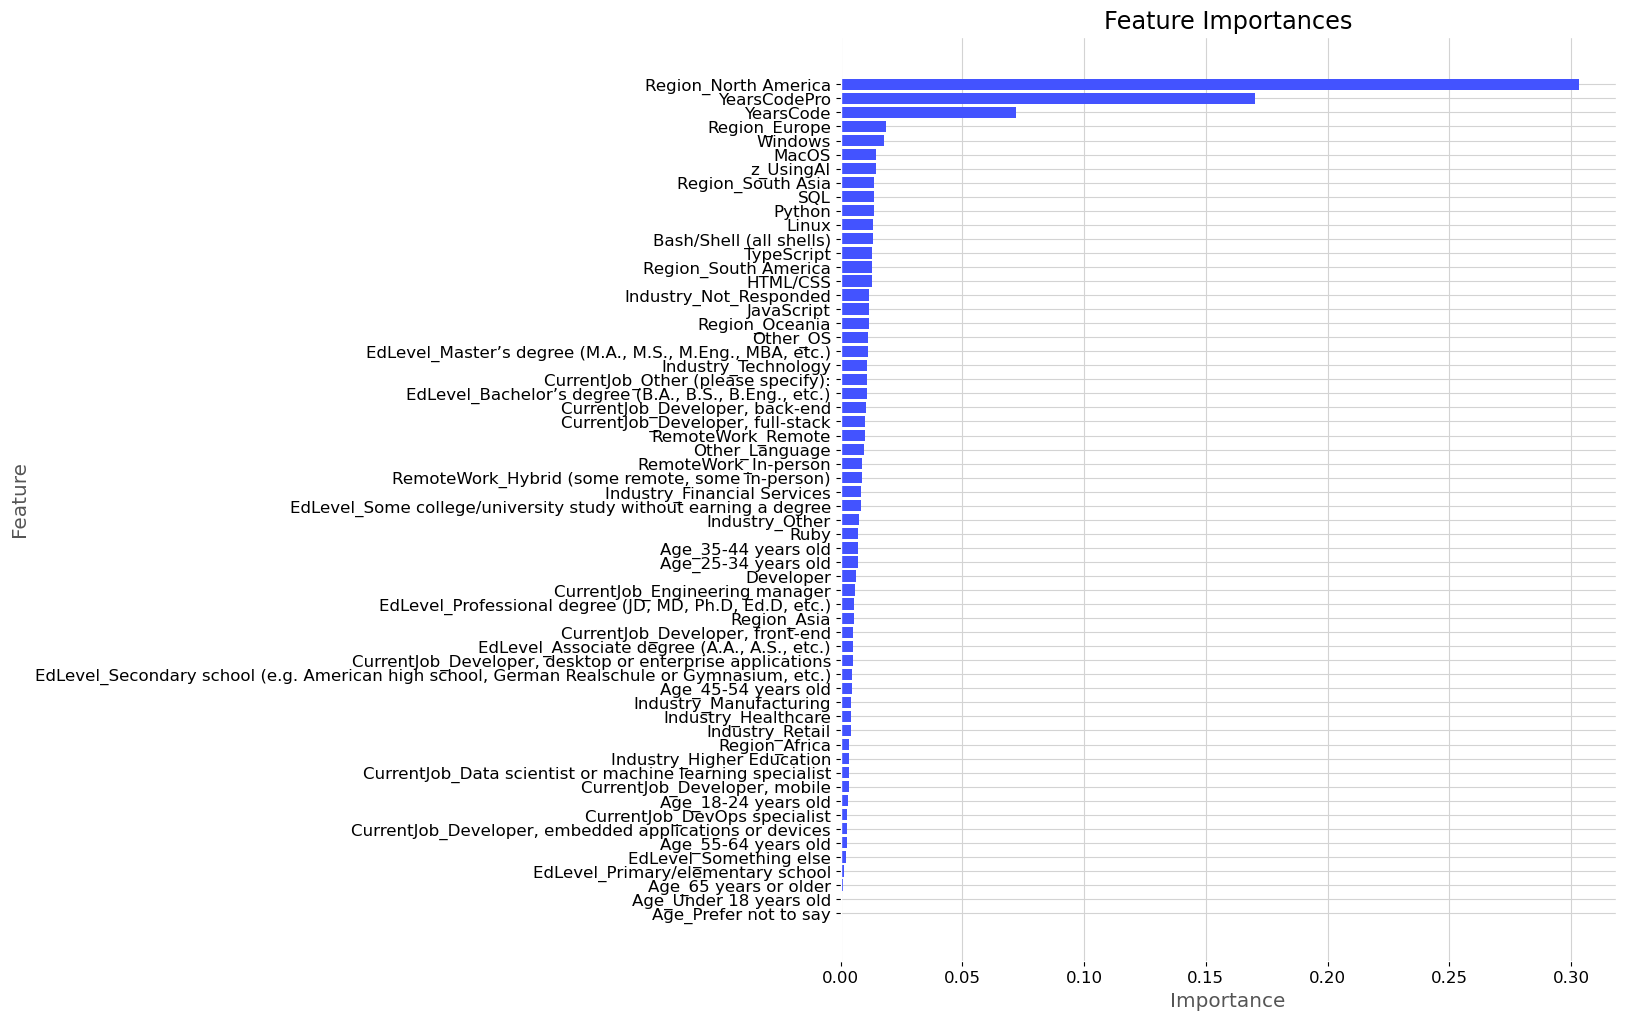

In [48]:
importances = rf_model.named_steps["regressor"].feature_importances_

feature_names = (rf_model.named_steps["preprocessor"]
                    .transformers_[1][1]
                    .named_steps["onehot"]
                    .get_feature_names_out(cat_cols))
all_feature_names = np.concatenate([num_cols, feature_names])

sorted_idx = importances.argsort()

plt.figure(figsize=(10, 12))
plt.barh(all_feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

<Axes: >

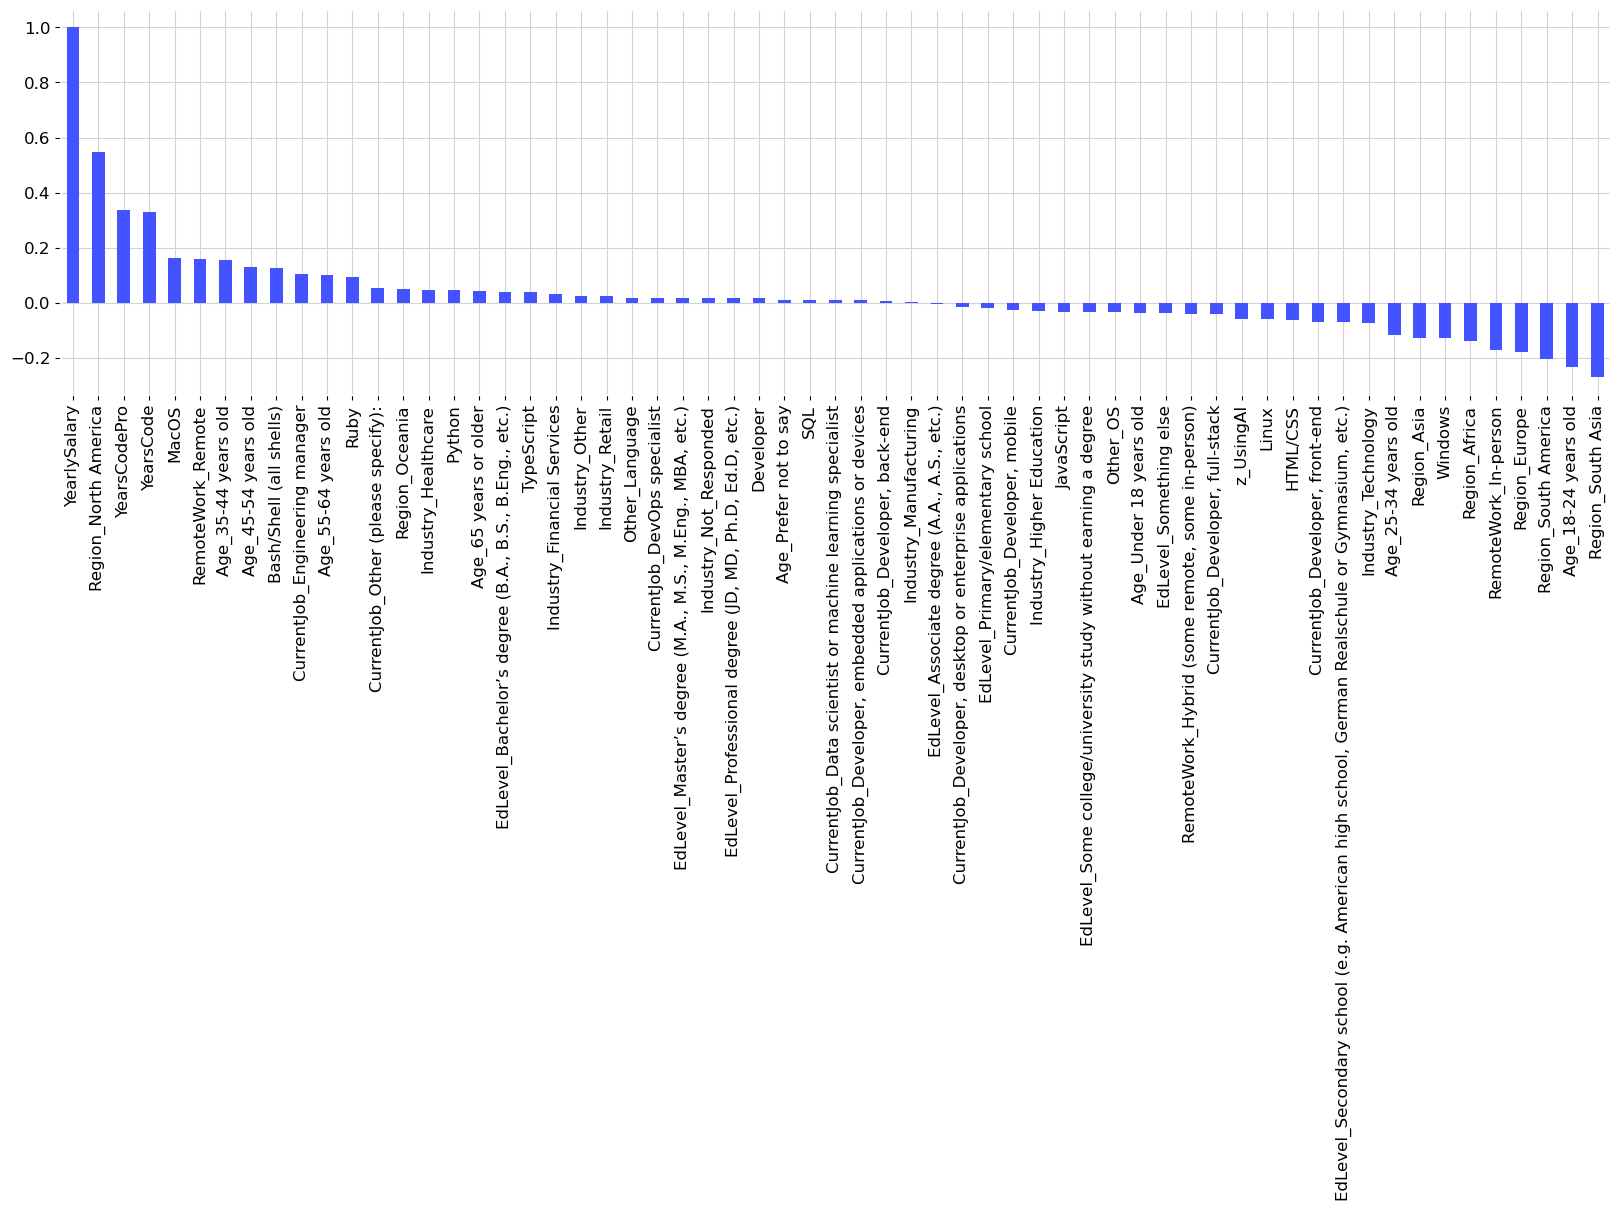

In [38]:
dummies =  pd.get_dummies(X)
pd.concat([dummies, y], axis='columns').corr()['YearlySalary'].sort_values(ascending=False).plot(kind='bar', figsize=(20, 5))

---
Okey, we still don't have dealed with the overfitting, but, we can visualize and make some conclusions:
1. Your Education Level seems to have very little impact on your salary. In this new world, you don't need a degree to earn more.
2. Your Current job does not make you earn more perse. Probably on average some roles are paid more than others, but that doesn't mean that you will earn much more if you change your job.
3. Although it may be thought that age is a factor due to the high correlation with salary, we can see that the model gives it very little importance, and takes more into account years of coding.
4. The most important factors that will determine your salary are, your region, your time making code, and if you are a Remote Worker or not.
5. I think the correlation with the OS is because most users of MacOS live in North America and Europe, and Windows users tend to live in Asia, Africa and South America.   

Let's Visualize it:

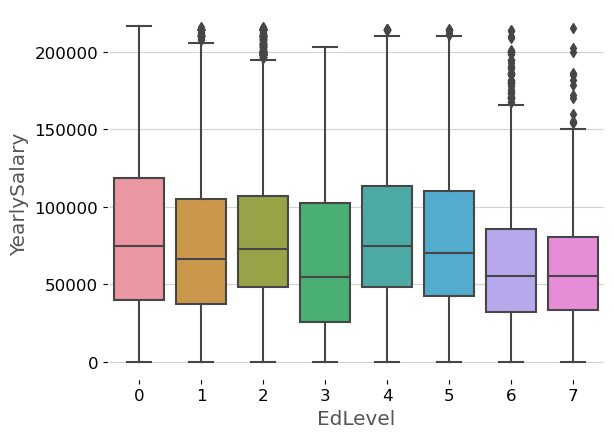

In [57]:
numeric_labels = list(range(len(df['EdLevel'].unique())))
sns.boxplot(data=df, x='EdLevel', y='YearlySalary')
plt.xticks(ticks=numeric_labels, labels=numeric_labels)
plt.show()

Can you see?? The Education Level has very little impact on your salary. In this new world, you don't need a degree to earn more!! almost 5 boxplots have the same median.

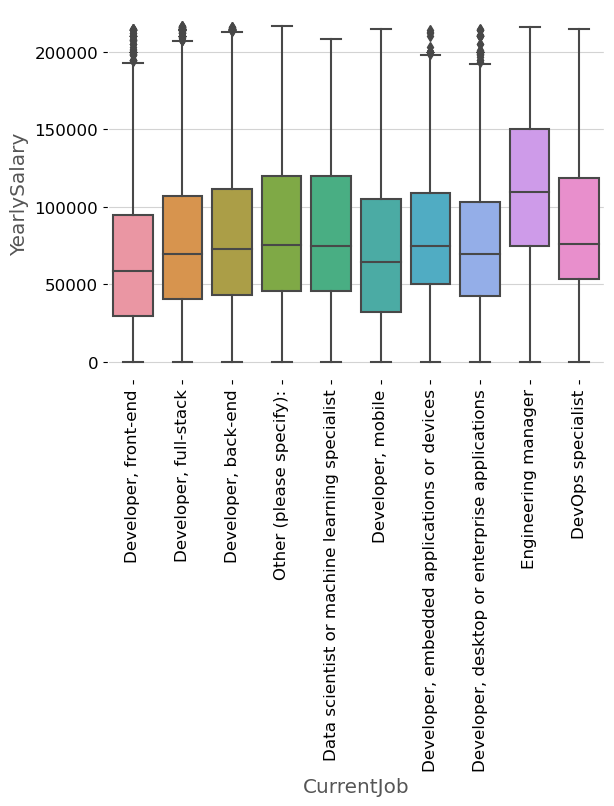

In [61]:
# numeric_labels = list(range(len(df['CurrentJob'].unique())))
sns.boxplot(data=df, x='CurrentJob', y='YearlySalary')
plt.xticks(rotation=90)
plt.show()

Wow, it looks the same with the Job. Engineering manager is the exception, but I think it is because it's a different kind of job, more managerial than technical!!

<Axes: xlabel='YearsCodePro', ylabel='YearlySalary'>

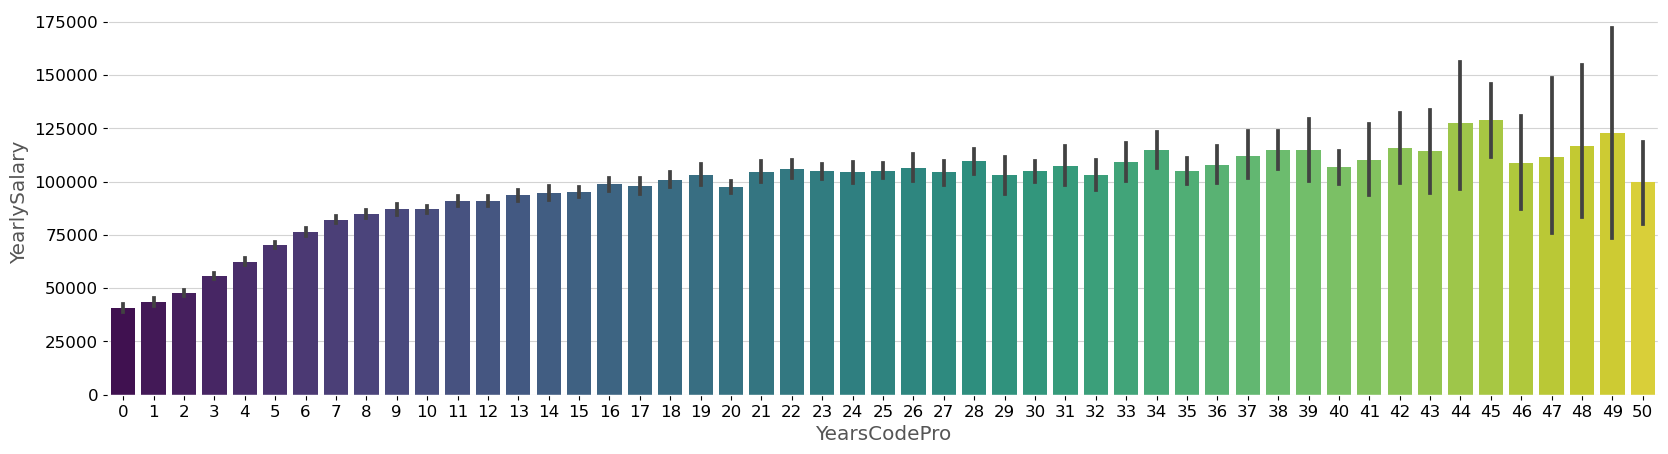

In [75]:
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
plt.figure(figsize=(20, 5))
sns.barplot(data=df, x='YearsCodePro', y='YearlySalary', palette='viridis')

Wow, from 5-15 years coding, your salary will just improve like 25% or so. after 15 years coding, your salary will not improve too much in a lifetime. So, the things that make people earn more, is not based on the time, I think it's in the value you can provide to the company. 

---
To perform an overfitted model, we can:
- Get more training examples
- Try smaller sets of features
- Try increasing the regularization parameter  

I don't have more training examples, but I can decrease the set of features based on the visualizations!!

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44649 entries, 0 to 44663
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      44649 non-null  object 
 1   CurrentJob               44649 non-null  object 
 2   EdLevel                  44649 non-null  object 
 3   Industry                 44649 non-null  object 
 4   RemoteWork               44649 non-null  object 
 5   YearlySalary             44649 non-null  float64
 6   YearsCode                44649 non-null  float64
 7   YearsCodePro             44649 non-null  int64  
 8   z_UsingAI                44649 non-null  int64  
 9   Developer                44649 non-null  int64  
 10  Region                   44649 non-null  object 
 11  MacOS                    44649 non-null  int64  
 12  Linux                    44649 non-null  int64  
 13  Windows                  44649 non-null  int64  
 14  Other_OS                 44

In [108]:
X2 = df.drop(['CurrentJob','EdLevel','Industry','YearlySalary','Developer','Other_OS','Other_Language','Age','Ruby'], axis='columns')
y2 = df['YearlySalary']

# I will increase the 0.7 to 0.8 to have more data for training
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, train_size=0.8, random_state=42
)

In [109]:
X2_train

,RemoteWork,YearsCode,YearsCodePro,z_UsingAI,Region,MacOS,Linux,Windows,JavaScript,HTML/CSS,SQL,Python,TypeScript,Bash/Shell (all shells)
31303,Remote,5.00,2,1,South Asia,1,0,0,1,1,0,0,1,0
33164,In-person,16.00,14,0,South Asia,1,1,0,1,1,0,0,0,0
2728,Remote,20.00,19,1,South America,1,1,1,0,0,0,0,0,0
15087,Remote,37.00,32,1,North America,1,1,1,1,1,1,0,1,0
20344,Remote,9.00,5,1,Europe,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,Remote,3.00,2,0,Europe,0,1,1,1,1,1,1,0,0
11290,"Hybrid (some remote, some in-person)",20.00,8,1,Europe,1,1,1,1,1,0,1,1,0
38171,"Hybrid (some remote, some in-person)",24.00,21,1,Europe,0,0,1,1,1,1,0,0,0
862,"Hybrid (some remote, some in-person)",22.00,7,1,Europe,1,1,0,0,0,0,0,0,1


In [110]:
num_cols = X2_train.select_dtypes(include="number").columns
num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

cat_cols = X2_train.select_dtypes(include="object").columns
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols),
    ]
)


In [111]:
rf_model2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor2),
        (
            "regressor",
            RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100),
        ),
    ]
)

In [112]:
rf_model2.fit(X2_train, y2_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['YearsCode', 'YearsCodePro', 'z_UsingAI', 'MacOS', 'Linux', 'Windows',
       'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'TypeScript',
       'Bash/Shell (all shells)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['RemoteWork', 'Region'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [113]:
rf_model2.score(X2_train, y2_train)

0.911281154809313

In [114]:
rf_model2.score(X2_test, y2_test)

0.4588214786437176

In [115]:
X2_train.shape

(35719, 14)

I tought that our model could perform better to the test data with less features, but it performs 6% worse!! A model with 46% accuracy is unnacceptable. + 35,000 values to train it's enough I think. So, I will try to increase the regularization parameter.

The good thing, is that we have too less features, so, the computational cost to do GridSearchCV will be much less.

In [117]:

param_grid = {
    "regressor__max_depth": [None, 10, 20, 30],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
    verbose=10
)


In [118]:
grid_search.fit(X2_train, y2_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2
[CV 2/5; 1/36] START regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2
[CV 4/5; 1/36] START regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2
[CV 3/5; 1/36] START regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2
[CV 2/5; 1/36] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2;, score=-1389129054.410 total time=   8.8s
[CV 3/5; 1/36] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2;, score=-1427775167.448 total time=   8.8s
[CV 5/5; 1/36] START regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2
[CV 1/5; 1/36] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['YearsCode', 'YearsCodePro', 'z_UsingAI', 'MacOS', 'Linux', 'Windows',
       'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'TypeScript',
       'Bash/Shell (all shells)'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['RemoteWork', 'Region'], dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=10)

In [119]:
grid_search.best_params_

{'regressor__max_depth': 10,
 'regressor__min_samples_leaf': 4,
 'regressor__min_samples_split': 10}

In [122]:
np.sqrt(-grid_search.best_score_)

35336.45325988618

In [133]:
param_grid = {
    "regressor__max_depth": [3, 5, 7],
    "regressor__min_samples_split": [10,15,20],
    "regressor__min_samples_leaf": [4,7,10],
    "regressor__n_estimators": [200]
}

grid_search2 = GridSearchCV(
    estimator=rf_model2,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    cv=5,
    verbose=10
)

In [134]:
grid_search2.fit(X2_train, y2_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200
[CV 3/5; 1/27] START regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200
[CV 2/5; 1/27] START regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200
[CV 4/5; 1/27] START regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200
[CV 1/5; 1/27] END regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200;, score=-1449374892.608 total time=   4.5s
[CV 5/5; 1/27] START regressor__max_depth=3, regressor__min_samples_leaf=4, regressor__min_samples_split=10, regressor__n_estimators=200
[CV 3/5; 1/27] END regressor__max_depth=3, regressor__min_samples_leaf=4, r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         Index(['YearsCode', 'YearsCodePro', 'z_UsingAI', 'MacOS', 'Linux', 'Windows',
       'JavaScript', 'HTML/CSS', 'SQL', 'Python', 'TypeScript',
       'Bash/Shell (all shells)'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['RemoteWork', 'Region'], dtype='object'))])),
                                       ('regressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [3, 5, 7],
                         'regressor__min_samples_leaf': [4, 7, 10],
                         'regressor__min_samples_split': [10, 15, 20],
                         'regressor__n_estimators': [200]},
             scoring='neg_mean_squared_error', verbose=10)

In [139]:
print(f"Your RMSE is: {np.sqrt(-grid_search2.score(X2_train, y2_train))}")

Your RMSE is: 35102.415359147686


# Conclusions:
As you can see, I couldn't get a good score. My Root Mean Squared Error is 35102, which means is our average error for each salary is +/- 35102 dollars:

In [161]:
new_data = df.drop(['CurrentJob','EdLevel','Industry','Developer','Other_OS','Other_Language','Age','Ruby'], axis='columns').sample(30)
X_new = new_data.drop('YearlySalary', axis='columns')
y_new = new_data['YearlySalary']

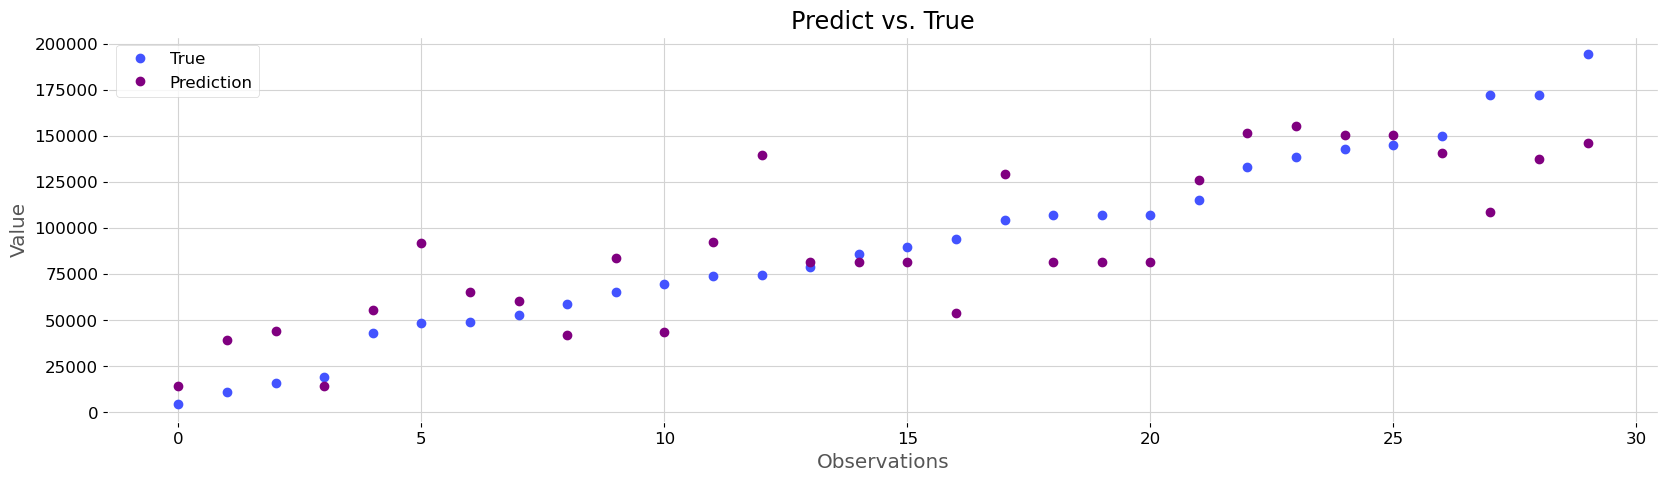

In [162]:
y_pred = grid_search2.predict(X_new)
plot_predicted_vs_true(y_new, y_pred)

It looks good, but we are using our training data (with 0.91 of score), so. it won't be useful for new information. Probably the points that are far away are the ones taked on the test data. We cannot trust in this graph, but it looks pretty u.u.  
Taking our model, let's predict our probable salary (just for fun):


In [167]:
X2.head(3)

,RemoteWork,YearsCode,YearsCodePro,z_UsingAI,Region,MacOS,Linux,Windows,JavaScript,HTML/CSS,SQL,Python,TypeScript,Bash/Shell (all shells)
0,"Hybrid (some remote, some in-person)",12.00,7,0,North America,1,0,0,1,1,1,0,1,1
1,Remote,6.00,4,1,South Asia,0,0,0,1,1,0,0,1,0
2,Remote,21.00,21,1,Europe,1,0,0,1,1,1,0,1,1


In [170]:
my_data = ['Remote','2','0','1','South America', 1,1,1,0,0,1,1,0,1]
my_data = pd.DataFrame([my_data], columns=X2.columns)

In [172]:
grid_search2.predict(my_data)

array([15568.55115049])

I think the result is really close to what I would expect living in Mexico as my first job in Data Science, so, for being my first professional project with actual real data, I'm happy with the results, but I will keep learning too much n.n